In [ ]:
import pandas as pd
import numpy as np
import glob

In [ ]:
!unzip "/content/mushroom data.zip"

Archive:  /content/mushroom data.zip
  inflating: mushroom_cleaned.csv    


In [ ]:
df=pd.read_csv("/content/mushroom_cleaned.csv")
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [ ]:
df['season'].min()

0.0273721330556057

In [ ]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

In [ ]:
df.corr()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334,-0.165676
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442,-0.133338
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315,-0.052541
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965,-0.063947
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292,0.183354
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679,-0.182856
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750,-0.128339
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000,-0.082919
class,-0.165676,-0.133338,-0.052541,-0.063947,0.183354,-0.182856,-0.128339,-0.082919,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [ ]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [ ]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

<Axes: xlabel='cap-diameter', ylabel='class'>

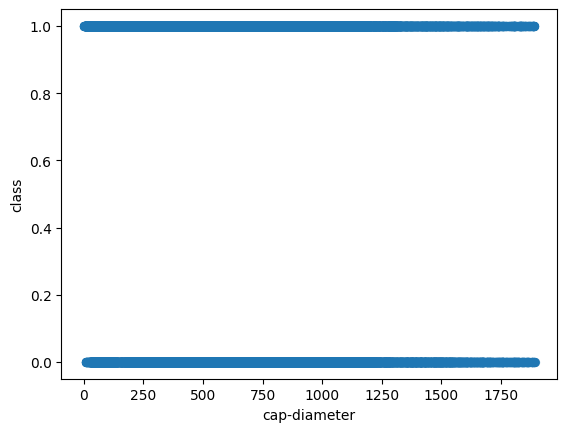

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cap-diameter', y="class", s=32, alpha=.8)

<Axes: xlabel='cap-shape', ylabel='class'>

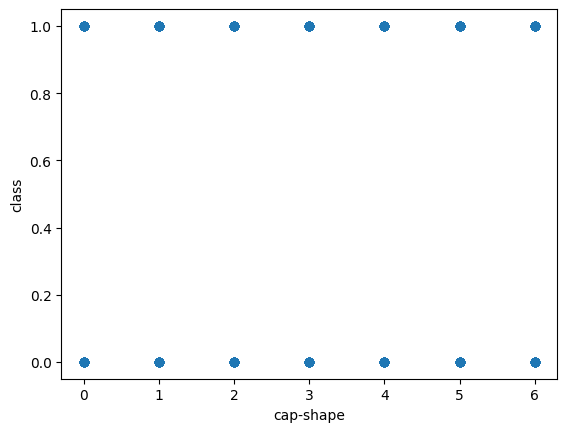

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cap-shape', y="class", s=32, alpha=.8)

<Axes: xlabel='season', ylabel='class'>

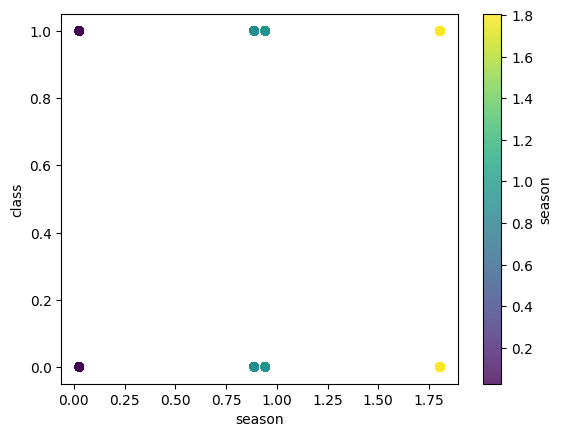

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='season', y="class", s=32, alpha=.8, c = 'season')

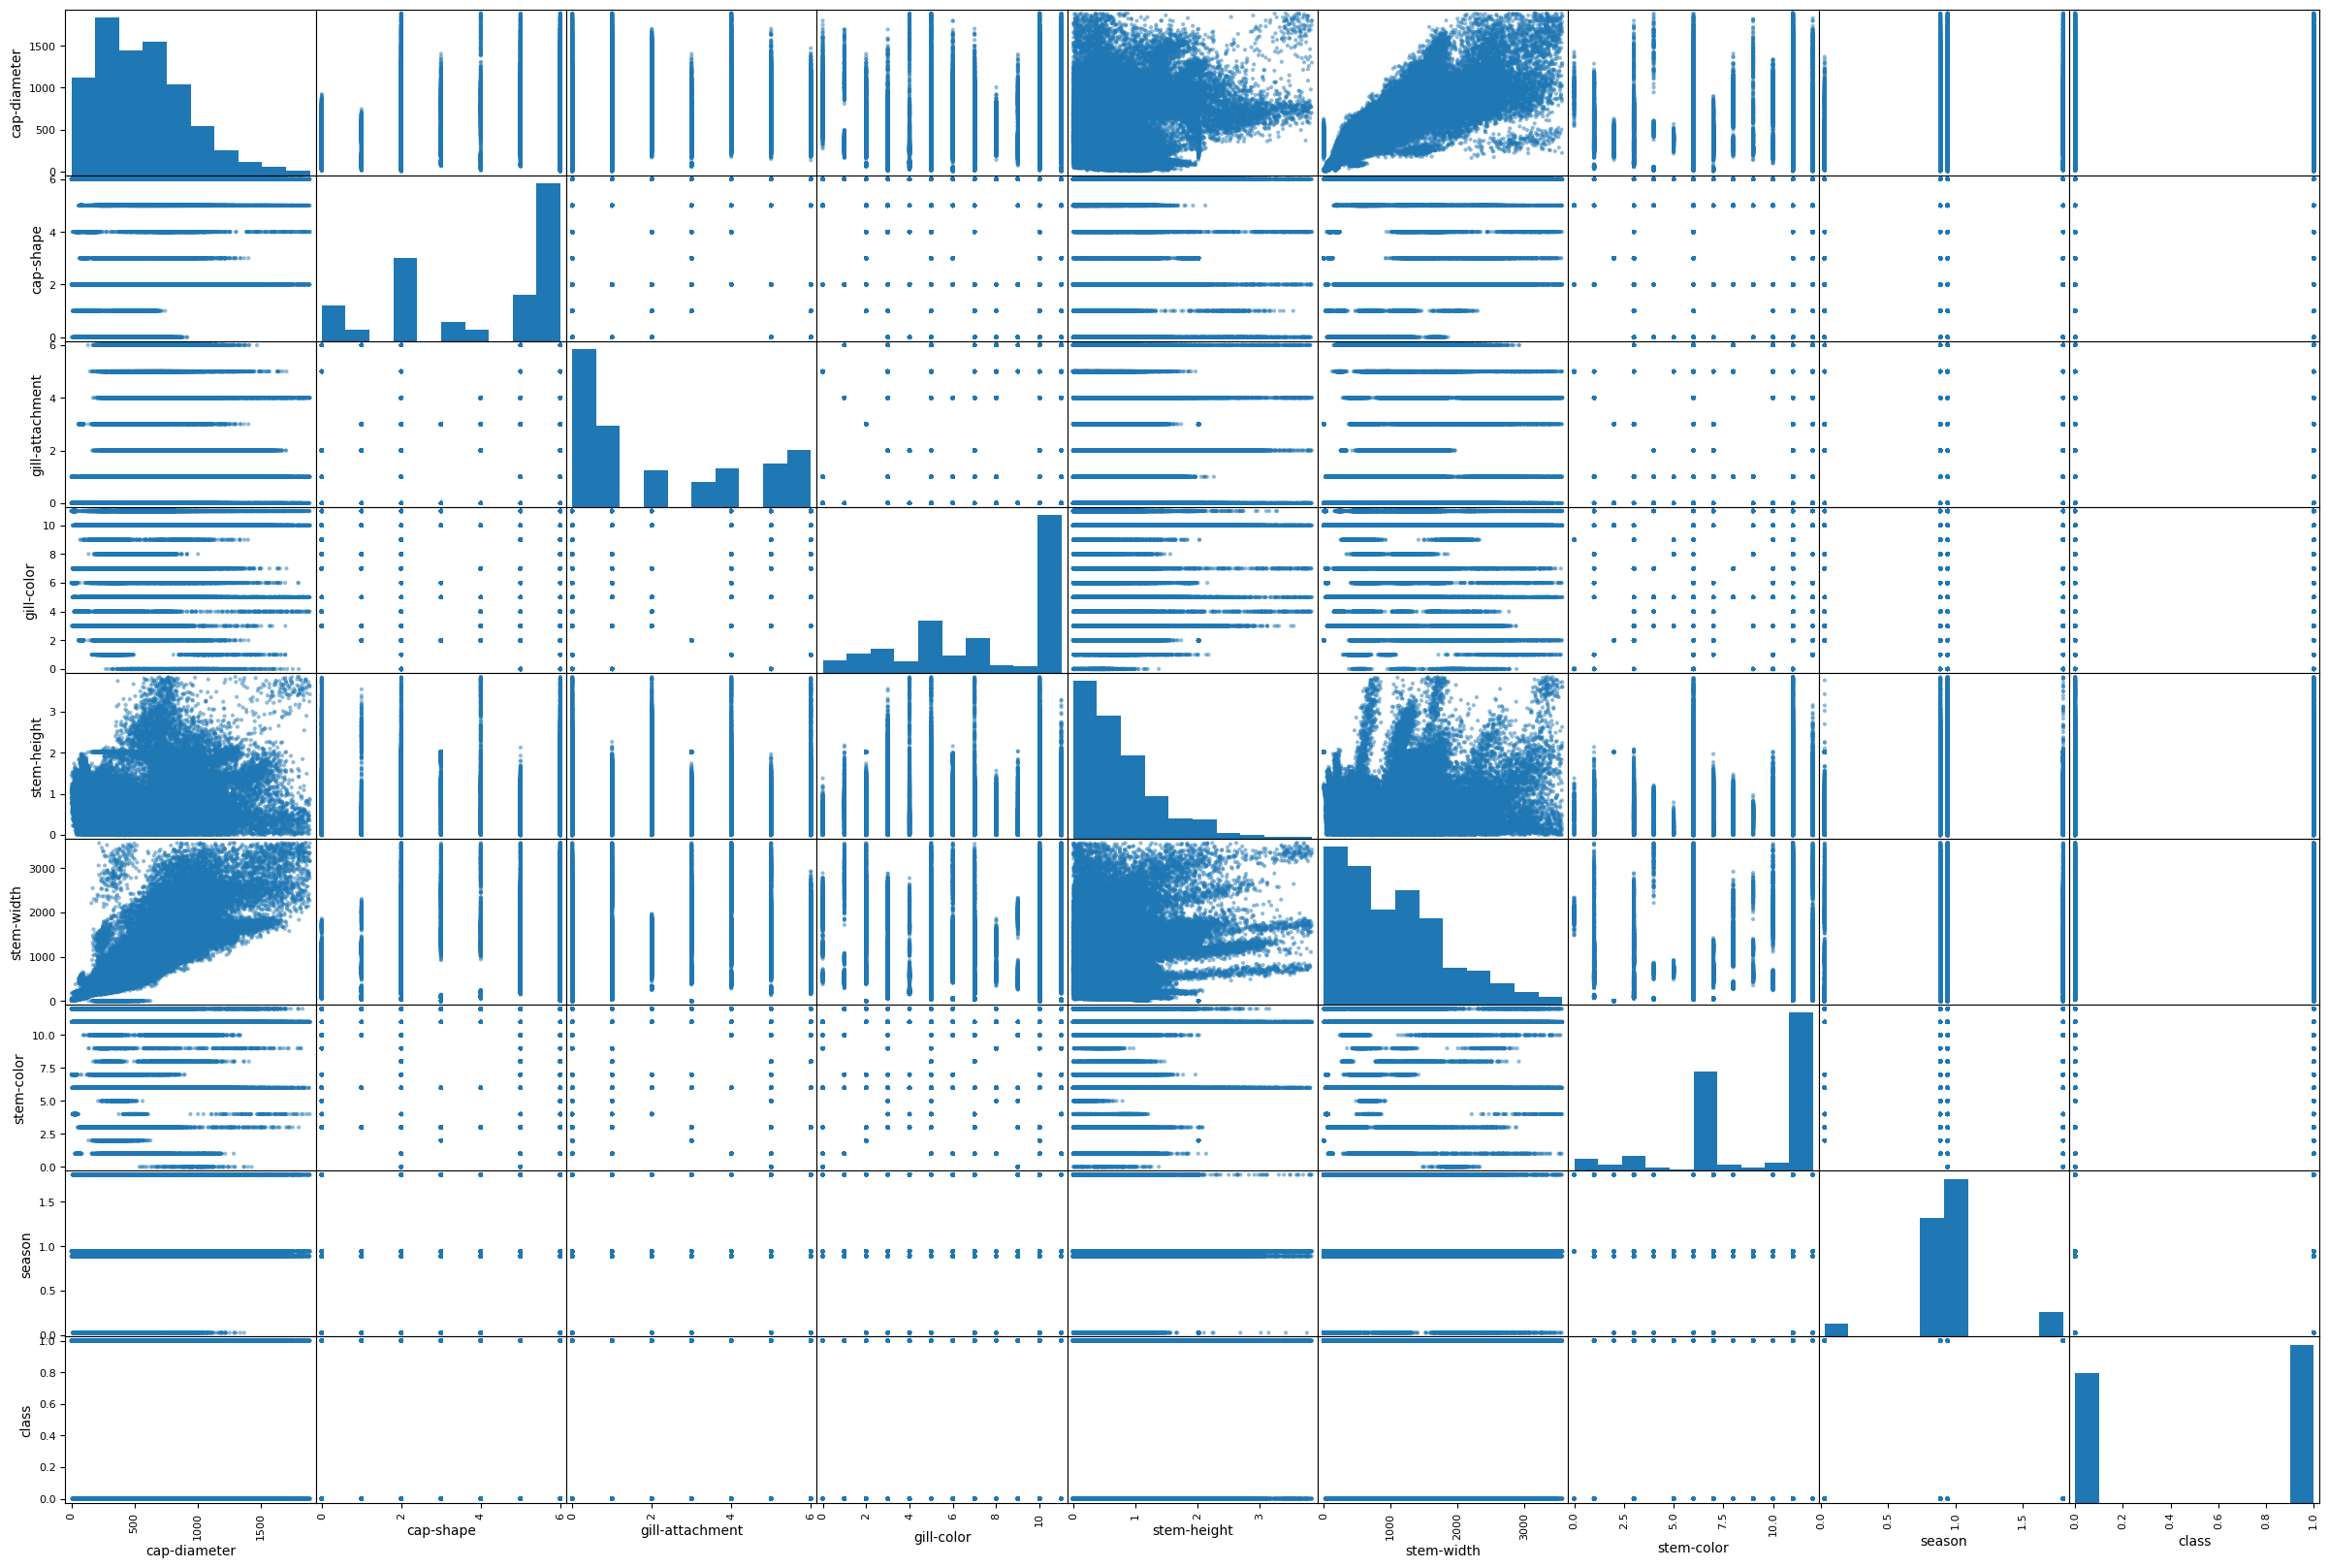

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

features=['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class']
scatter_matrix(df[features], figsize=(30, 20));
plt.show()

In [ ]:
X=df.drop('class', axis=1)
y=df['class'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43228, 8), (10807, 8), (43228,), (10807,))

In [ ]:
cat_features=X_train.select_dtypes(exclude=[np.number]).columns
num_features=X_train.select_dtypes(include=[np.number]).columns

In [ ]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

transformer = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_features)
])

In [ ]:
X_train_transformed=transformer.fit_transform(X_train)
columns=transformer.get_feature_names_out()
X_train_transformed_df=pd.DataFrame(X_train_transformed, columns=columns)

In [ ]:
X_test_transformed = transformer.transform(X_test)
columns = transformer.get_feature_names_out()
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=columns)

In [ ]:
# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DTC = DecisionTreeClassifier(max_depth=10)
DTC.fit(X_train_transformed_df, y_train)
DTC.score(X_train_transformed_df, y_train)

0.90061996853891

In [ ]:
DTC.score(X_test_transformed_df, y_test)

0.894512815767558

In [ ]:
from sklearn.metrics import f1_score
y_pred = DTC.predict(X_test_transformed_df)

f1 = f1_score(y_test, y_pred)
f1

0.9005582693649686

In [ ]:
# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

LR = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('logistic', LogisticRegression(max_iter=1000, random_state=42))
])
LR.fit(X_train_transformed_df, y_train)
y_pred = LR.predict(X_test_transformed_df)


In [ ]:
LR.score(X_train_transformed_df, y_train)


0.693485703710558

In [ ]:
LR.score(X_test_transformed_df, y_test)

0.6903858610160082

In [ ]:
from sklearn.metrics import f1_score
y_pred = LR.predict(X_test_transformed_df)

f1 = f1_score(y_test, y_pred)
f1

0.7225538971807628

In [ ]:
# SVC

In [ ]:
from sklearn.svm import SVC

SVC=SVC()
SVC.fit(X_train_transformed_df, y_train)
y_pred = SVC.predict(X_test_transformed_df)

In [ ]:
SVC.score(X_test_transformed_df, y_test)

0.9056167298972888

In [ ]:
SVC.score(X_train_transformed_df, y_train)

0.9059637272138429

In [ ]:
from sklearn.metrics import f1_score
y_pred = SVC.predict(X_test_transformed_df)

f1 = f1_score(y_test_transformed, y_pred)
f1

In [ ]:
# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train_transformed_df, y_train)

RandomForestClassifier()

In [ ]:
RFC.score(X_test_transformed_df, y_test)

0.9904691403719811

In [ ]:
RFC.score(X_train_transformed_df, y_train)

1.0

In [ ]:
from sklearn.metrics import f1_score
y_pred = RFC.predict(X_test_transformed_df)

f1 = f1_score(y_test, y_pred)
f1

0.9912734050665085

In [ ]:
# VOTING CLASSIFIER

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42)),
        ('dtc', DecisionTreeClassifier(random_state=42))
    ]
)
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('dtc', DecisionTreeClassifier(random_state=42))])

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
  print(name, '=', clf.score(X_test, y_test))

lr = 0.6255204959748312
rf = 0.9906542056074766
svc = 0.6432867585824003
dtc = 0.9766817803275655
